<a href="https://colab.research.google.com/github/varunadityabalaji/Bank-Note-Authentication/blob/master/Mizzou.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/drive')

In [0]:
import pandas as pd

In [0]:
import numpy as np
import time

In [0]:
import seaborn as sb

In [0]:
import matplotlib.pyplot as plt

In [0]:
import time as time

In [0]:

from plotly.offline import iplot,init_notebook_mode

In [0]:
import plotly.graph_objs as go

In [0]:
%matplotlib inline

In [0]:
my_list = []

In [0]:
bank_data = pd.read_csv('bank_note_data.csv')

In [0]:
bank_data.head() 

,Image.Var,Image.Skew,Image.Curt,Entropy,Class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [0]:
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
Image.Var     1372 non-null float64
Image.Skew    1372 non-null float64
Image.Curt    1372 non-null float64
Entropy       1372 non-null float64
Class         1372 non-null int64
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


In [0]:
bank_data.describe()

,Image.Var,Image.Skew,Image.Curt,Entropy,Class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


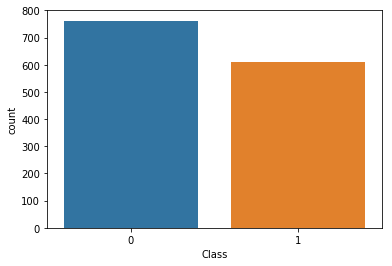

In [0]:
h= sb.countplot(x='Class',data = bank_data)
fig = h.get_figure()
fig.savefig('figure.png')

/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning:

invalid value encountered in true_divide

/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning:

invalid value encountered in double_scalars



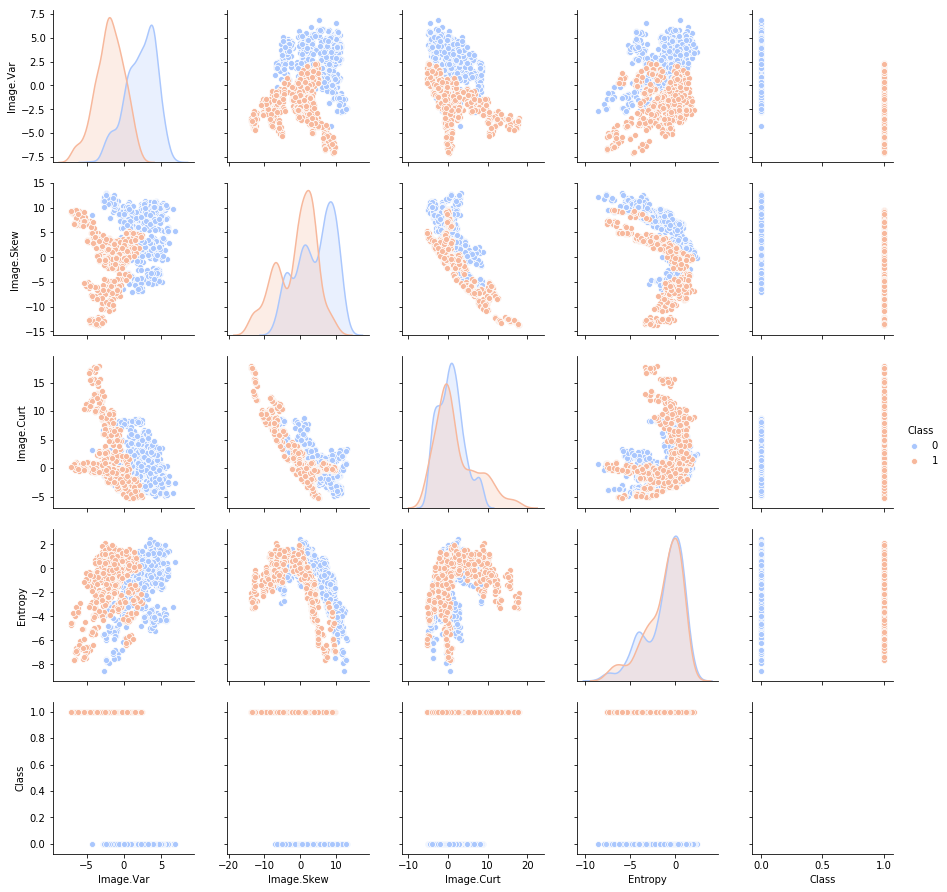

In [0]:
sb.pairplot(data = bank_data,palette = 'coolwarm',hue='Class')



## Data Preparation 







In [0]:
from sklearn.preprocessing import StandardScaler

In [0]:
scaler = StandardScaler()

In [0]:
scaler.fit(bank_data.drop('Class',axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [0]:
scaled_features = scaler.transform(bank_data.drop('Class',axis=1))

In [0]:
bank_data_scaled = pd.DataFrame(scaled_features,columns=bank_data.columns[:-1])
bank_data_scaled.head()

,Image.Var,Image.Skew,Image.Curt,Entropy
0,1.121806,1.149455,-0.975970,0.354561
1,1.447066,1.064453,-0.895036,-0.128767
2,1.207810,-0.777352,0.122218,0.618073
3,1.063742,1.295478,-1.255397,-1.144029
4,-0.036772,-1.087038,0.736730,0.096587


## Train Test Split



In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X = bank_data_scaled

In [0]:
y = bank_data['Class']

In [0]:
X_train, X_test, y_train, y_test = train_test_split(bank_data_scaled,bank_data['Class'],
                                                    test_size=0.30,random_state=42)

# Tensorflow

In [0]:
import tensorflow as tf

In [0]:
feat_cols = []
for x in bank_data_scaled.columns:
  feat_cols.append(tf.feature_column.numeric_column(x))
  

In [0]:
feat_cols

In [0]:
input_func = tf.estimator.inputs.pandas_input_fn(x=X_train,y=y_train,batch_size=10,num_epochs=1,shuffle=True)

In [0]:
start = time.time()
classifier = tf.estimator.DNNClassifier(hidden_units = [10,10],n_classes=2,feature_columns =feat_cols )

W0726 14:38:19.912785 139931152443264 estimator.py:1811] Using temporary folder as model directory: /tmp/tmpqyj8apcb


In [0]:
classifier.train(input_fn = input_func,steps = 50)
nntime = time.time()-start
my_list.append(nntime)
print(nntime)

W0726 14:38:21.611922 139931152443264 basic_session_run_hooks.py:724] It seems that global step (tf.train.get_global_step) has not been increased. Current value (could be stable): 2 vs previous value: 2. You could increase the global step by passing tf.train.get_global_step() to Optimizer.apply_gradients or Optimizer.minimize.
W0726 14:38:21.625366 139931152443264 basic_session_run_hooks.py:724] It seems that global step (tf.train.get_global_step) has not been increased. Current value (could be stable): 5 vs previous value: 5. You could increase the global step by passing tf.train.get_global_step() to Optimizer.apply_gradients or Optimizer.minimize.
W0726 14:38:21.650219 139931152443264 basic_session_run_hooks.py:724] It seems that global step (tf.train.get_global_step) has not been increased. Current value (could be stable): 9 vs previous value: 9. You could increase the global step by passing tf.train.get_global_step() to Optimizer.apply_gradients or Optimizer.minimize.


1.899655818939209


## Model Evaluation

In [0]:
pred_fn = tf.estimator.inputs.pandas_input_fn(x=X_test,batch_size=len(X_test),shuffle=False)

In [0]:
note_predictions = list(classifier.predict(input_fn=pred_fn))

In [0]:
final_preds  = []
for pred in note_predictions:
    final_preds.append(pred['class_ids'][0])

In [0]:
from sklearn.metrics import classification_report,confusion_matrix

In [0]:
print(confusion_matrix(y_test,final_preds))

[[225   4]
 [  6 177]]


In [0]:
print(classification_report(y_test,final_preds))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98       229
           1       0.98      0.97      0.97       183

    accuracy                           0.98       412
   macro avg       0.98      0.97      0.98       412
weighted avg       0.98      0.98      0.98       412



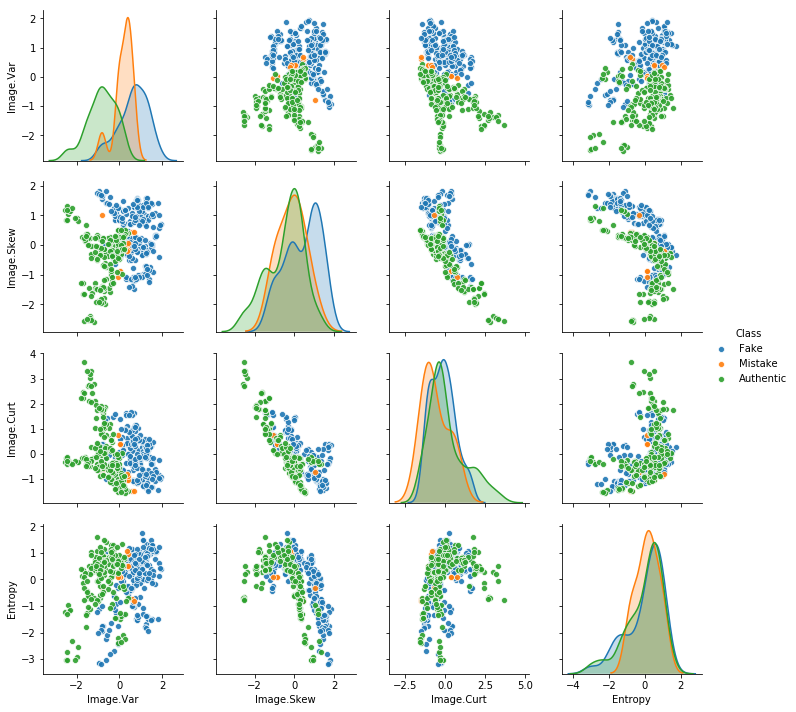

In [0]:
results = []
for i in range(len(y_test)):
    if y_test.iloc[i] == final_preds[i]:
        if final_preds[i] == 0:
            results.append("Fake")
        else:
            results.append("Authentic")
    else:
        results.append("Mistake")
ser = pd.Series(results, name = 'Class')
df = X_test.copy().reset_index(drop=True)
df['Class'] = ser
sb.pairplot(data=df, hue = 'Class', plot_kws={'alpha': 0.9} )

# Random Forests

We will now use Random Forests to Predict the output.

In [0]:
from sklearn.ensemble import RandomForestClassifier
start = time.time()

rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)
rftime = time.time()-start
my_list.append(rftime)

print(rftime)

0.19605803489685059


In [0]:
pred = rfc.predict(X_test)

In [0]:
print(confusion_matrix(y_test,pred))

[[229   0]
 [  2 181]]


In [0]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       229
           1       1.00      0.99      0.99       183

    accuracy                           1.00       412
   macro avg       1.00      0.99      1.00       412
weighted avg       1.00      1.00      1.00       412



In [0]:

results = []

for i in range(len(y_test)):
    if y_test.iloc[i] == pred[i]:
        if pred[i] == 0:
            results.append("Fake")
        else:
            results.append("Authentic")
    else:
        results.append("Mistake")
ser = pd.Series(results, name = 'Class')

df = X_test.copy().reset_index(drop=True)
df['Class'] = ser

# Logistic Regression
We will now use Random Forests to Predict the output

In [0]:
from sklearn.linear_model import LogisticRegression

In [0]:
logmodel = LogisticRegression()
start = time.time()
logmodel.fit(X_train,y_train)
lgtime = time.time()-start
my_list.append(lgtime)
print(lgtime)

0.013016223907470703


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.



In [0]:
predictions = logmodel.predict(X_test)

In [0]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98       229
           1       0.97      0.99      0.98       183

    accuracy                           0.98       412
   macro avg       0.98      0.98      0.98       412
weighted avg       0.98      0.98      0.98       412



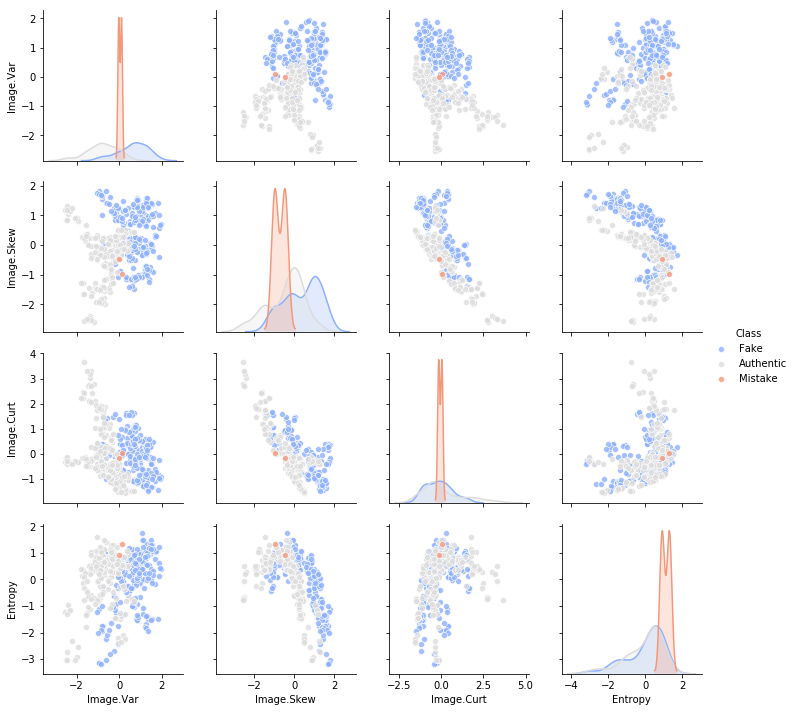

In [0]:

results = []

for i in range(len(y_test)):
    if y_test.iloc[i] == pred[i]:
        if pred[i] == 0:
            results.append("Fake")
        else:
            results.append("Authentic")
    else:
        results.append("Mistake")
ser = pd.Series(results, name = 'Class')

df = X_test.copy().reset_index(drop=True)
df['Class'] = ser
sb.pairplot(data=df, hue = 'Class', plot_kws={'alpha': 0.8}, palette = 'coolwarm' )

# K Nearest Neighbours

In [0]:
from sklearn.neighbors import KNeighborsClassifier

In [0]:
error_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))


Text(0, 0.5, 'Error Rate')

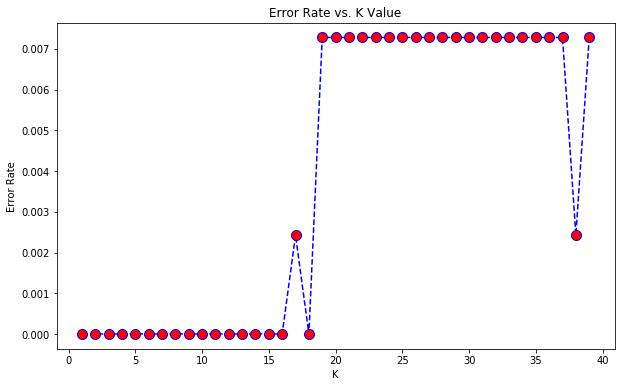

In [0]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [0]:
# NOW WITH K=30
start = time.time()

knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train,y_train)
pred = knn.predict(X_test)

knntime = time.time() - start
my_list.append(knntime)
print("Time: ", knntime)
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

Time:  0.026084423065185547


[[229   0]
 [  0 183]]


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       229
           1       1.00      1.00      1.00       183

    accuracy                           1.00       412
   macro avg       1.00      1.00      1.00       412
weighted avg       1.00      1.00      1.00       412



In [0]:

results = []

for i in range(len(y_test)):
    if y_test.iloc[i] == pred[i]:
        if pred[i] == 0:
            results.append("Fake")
        else:
            results.append("Authentic")
    else:
        results.append("Mistake")
ser = pd.Series(results, name = 'Class')

df = X_test.copy().reset_index(drop=True)
df['Class'] = ser

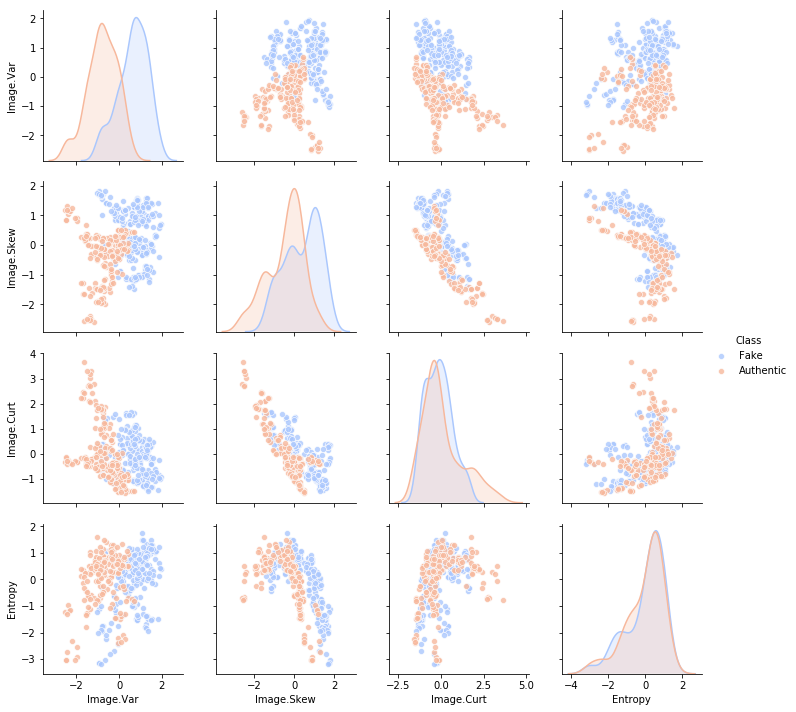

In [0]:
sb.pairplot(data=df, hue = 'Class', plot_kws={'alpha': 0.8}, palette = 'coolwarm' )

# Time Taken By Different Methods
A graph that compares the time taken by the different models.


Text(0, 0.5, 'Time')

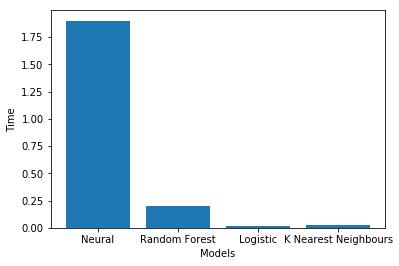

In [0]:
modules = ['Neural','Random Forest','Logistic','K Nearest Neighbours']
plt.bar(modules,my_list)
plt.xlabel('Models')
plt.ylabel('Time')